In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')

In [26]:
df=pd.read_csv('/Users/keumhyeonjun/Projects/kisti_renewal/dataset_final/Dataset_4_2016.csv')
df

,index,Project_ID,Year,N_of_SCI,N_of_Paper,N_Patent_App,N_Patent_Reg,N_of_Korean_Patent,N_of_Inter_Patent,N_of_Patent,...,Cowork_Abroad,Cowork_etc,Log_RnD_Fund,Log_Duration,Comm_Success,Comm_Success_1,Comm_Success_2,Comm_Success_Code1_4,Comm_Success_Code2_5,Comm_Success_Code3_6
0,0,1055000474,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,21.365120,5.897157,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1055000475,2013.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,19.568083,5.897157,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1055000476,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,21.365120,5.897157,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1055000477,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,19.673444,5.808145,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1055000478,2014.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,17.504390,4.804029,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192874,192874,9991006121,2016.0,0.0,0.0,2.0,1.0,3.0,0.0,3.0,...,N,N,20.723266,6.302621,0.0,0.0,0.0,0.0,0.0,0.0
192875,192875,9991006122,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,Y,21.920324,6.302621,0.0,0.0,0.0,0.0,0.0,0.0
192876,192876,9991006124,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N,N,20.482467,6.998511,0.0,0.0,0.0,0.0,0.0,0.0
192877,192877,9991006125,2016.0,0.0,0.0,2.0,2.0,4.0,0.0,4.0,...,N,N,20.430236,6.998511,1.0,1.0,0.0,0.0,1.0,0.0


In [27]:
NUMERIC_COLUMN = [
    "Log_RnD_Fund",
    "Log_Duration",
    "N_of_SCI",
    "N_of_Paper",
    "N_Patent_App",
    "N_Patent_Reg",
    "N_of_Korean_Patent",
    "STP_Code_1_Weight",
    "STP_Code_2_Weight",
    "Application_Area_1_Weight",
    "Application_Area_2_Weight",
]

CATEGORICAL_COLUMN = [
    "Year",
    "Multi_Year",
    "RnD_Org",
    "STP_Code_11",
    "STP_Code_21",
    "Application_Area_1",
    "Application_Area_2",
    "Green_Tech",
    "SixT_2",
    "Econ_Social",
    "National_Strategy_2",
    "RnD_Stage",
    "Cowork_Cor",
    "Cowork_Uni",
    "Cowork_Inst",
    "Cowork_Abroad",
    "Cowork_etc",
]

LABEL_COLUMN = ["Comm_Success"]

# 불필요한 컬럼 제거(데이터로 사용하지 않을 것들)

In [28]:
ALL_COLUMN = df.columns.tolist()
UNNESSARY_COLUMN=list(set(ALL_COLUMN)-set(NUMERIC_COLUMN)-set(CATEGORICAL_COLUMN)-set(LABEL_COLUMN))

In [29]:
data = df[NUMERIC_COLUMN+CATEGORICAL_COLUMN+LABEL_COLUMN]
data

,Log_RnD_Fund,Log_Duration,N_of_SCI,N_of_Paper,N_Patent_App,N_Patent_Reg,N_of_Korean_Patent,STP_Code_1_Weight,STP_Code_2_Weight,Application_Area_1_Weight,...,SixT_2,Econ_Social,National_Strategy_2,RnD_Stage,Cowork_Cor,Cowork_Uni,Cowork_Inst,Cowork_Abroad,Cowork_etc,Comm_Success
0,21.365120,5.897157,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,70000,13,60000,4,N,N,N,N,N,0.0
1,19.568083,5.897157,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,70000,13,60000,4,N,N,N,N,N,0.0
2,21.365120,5.897157,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,70000,13,60000,4,N,N,N,N,N,0.0
3,19.673444,5.808145,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,70000,13,60000,4,N,N,N,N,N,0.0
4,17.504390,4.804029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,70000,13,60000,4,N,N,N,N,N,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192874,20.723266,6.302621,0.0,0.0,2.0,1.0,3.0,50.0,30.0,50.0,...,20200,11,40100,2,N,N,N,N,N,0.0
192875,21.920324,6.302621,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,20200,4,60000,3,N,N,N,N,Y,0.0
192876,20.482467,6.998511,0.0,0.0,0.0,0.0,0.0,80.0,20.0,60.0,...,30200,7,10500,3,Y,N,Y,N,N,0.0
192877,20.430236,6.998511,0.0,0.0,2.0,2.0,4.0,100.0,0.0,100.0,...,30200,7,10500,3,Y,N,Y,N,N,1.0


#### [LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero >> 해결하기


In [30]:
#카테고리 컬럼 > 0,1,2,3....변경
for i in CATEGORICAL_COLUMN:
    value = data[i].unique()
    val_list = list(value)
    new_val_list = list(range(0, len(val_list)))
    data[i]= data[i].replace(val_list,new_val_list)
data

,Log_RnD_Fund,Log_Duration,N_of_SCI,N_of_Paper,N_Patent_App,N_Patent_Reg,N_of_Korean_Patent,STP_Code_1_Weight,STP_Code_2_Weight,Application_Area_1_Weight,...,SixT_2,Econ_Social,National_Strategy_2,RnD_Stage,Cowork_Cor,Cowork_Uni,Cowork_Inst,Cowork_Abroad,Cowork_etc,Comm_Success
0,21.365120,5.897157,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0.0
1,19.568083,5.897157,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0.0
2,21.365120,5.897157,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0.0
3,19.673444,5.808145,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0.0
4,17.504390,4.804029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192874,20.723266,6.302621,0.0,0.0,2.0,1.0,3.0,50.0,30.0,50.0,...,4,4,7,2,0,0,0,0,0,0.0
192875,21.920324,6.302621,0.0,0.0,0.0,0.0,0.0,100.0,0.0,100.0,...,4,5,0,3,0,0,0,0,1,0.0
192876,20.482467,6.998511,0.0,0.0,0.0,0.0,0.0,80.0,20.0,60.0,...,9,2,8,3,1,0,1,0,0,0.0
192877,20.430236,6.998511,0.0,0.0,2.0,2.0,4.0,100.0,0.0,100.0,...,9,2,8,3,1,0,1,0,0,1.0


In [31]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)
x_train  = train_data.drop(LABEL_COLUMN,axis = 1)
y_train = train_data[LABEL_COLUMN]

x_val  = val_data.drop(LABEL_COLUMN,axis = 1)
y_val = val_data[LABEL_COLUMN]

x_test  = test_data.drop(LABEL_COLUMN,axis = 1)
y_test = test_data[LABEL_COLUMN]


In [34]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score


def objective(trial):
    param = {
        "objective": "binary",
        "metric": "binary_error",
        "boosting_type": "gbdt",
        'verbose' : -1,
        'silent' : 1,
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
    }
    lgbm = LGBMClassifier(**param)
    lgbm.fit(x_train, y_train,  eval_set = (x_val,y_val),
             categorical_feature =CATEGORICAL_COLUMN, verbose=-1)
    pred = lgbm.predict(x_test)
    f1 = f1_score(y_test, pred)

    return f1
sampler = optuna.samplers.TPESampler(seed=10)
studyLGBM = optuna.create_study(sampler = sampler, direction='maximize')
studyLGBM.optimize( objective, n_trials = 100)

print('study.best_params:', studyLGBM.best_trial.value)
print('Number of finished trials:', len(studyLGBM.trials))
print('Best trial:', studyLGBM.best_trial.params)
print('study.best_params:', studyLGBM.best_params)


[I 2022-09-30 13:49:49,007] A new study created in memory with name: no-name-6c33931f-44cd-49ba-83e5-486ca01e8740
[I 2022-09-30 13:49:55,621] Trial 0 finished with value: 0.5032068412613575 and parameters: {'num_leaves': 396, 'feature_fraction': 0.11867675442346136, 'bagging_fraction': 0.6702834114336479, 'bagging_freq': 11, 'min_child_samples': 50}. Best is trial 0 with value: 0.5032068412613575.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.27825657828366157, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.27825657828366157
[LightGBM] [Warning] bagging_fraction is set=0.7844776409790628, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7844776409790628


[I 2022-09-30 13:50:02,370] Trial 1 finished with value: 0.5852472961477702 and parameters: {'num_leaves': 116, 'feature_fraction': 0.27825657828366157, 'bagging_fraction': 0.7844776409790628, 'bagging_freq': 2, 'min_child_samples': 9}. Best is trial 1 with value: 0.5852472961477702.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.9580540115754429, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9580540115754429
[LightGBM] [Warning] bagging_fraction is set=0.10355343969512301, subsample=1.0 will be ignored. Current value: bagging_fraction=0.10355343969512301


[I 2022-09-30 13:50:07,419] Trial 2 finished with value: 0.5689025109041612 and parameters: {'num_leaves': 352, 'feature_fraction': 0.9580540115754429, 'bagging_fraction': 0.10355343969512301, 'bagging_freq': 8, 'min_child_samples': 82}. Best is trial 1 with value: 0.5852472961477702.


[LightGBM] [Warning] bagging_freq is set=14, subsample_freq=0 will be ignored. Current value: bagging_freq=14
[LightGBM] [Warning] feature_fraction is set=0.7495797856886196, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7495797856886196
[LightGBM] [Warning] bagging_fraction is set=0.3626884613535699, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3626884613535699


[I 2022-09-30 13:50:20,002] Trial 3 finished with value: 0.5990214352283317 and parameters: {'num_leaves': 315, 'feature_fraction': 0.7495797856886196, 'bagging_fraction': 0.3626884613535699, 'bagging_freq': 14, 'min_child_samples': 72}. Best is trial 3 with value: 0.5990214352283317.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.22795304284137427, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.22795304284137427
[LightGBM] [Warning] bagging_fraction is set=0.43600668404632226, subsample=1.0 will be ignored. Current value: bagging_fraction=0.43600668404632226


[I 2022-09-30 13:50:29,607] Trial 4 finished with value: 0.5641025641025641 and parameters: {'num_leaves': 279, 'feature_fraction': 0.22795304284137427, 'bagging_fraction': 0.43600668404632226, 'bagging_freq': 10, 'min_child_samples': 45}. Best is trial 3 with value: 0.5990214352283317.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.6559902806223854, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6559902806223854
[LightGBM] [Warning] bagging_fraction is set=0.5618244182989518, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5618244182989518


[I 2022-09-30 13:50:39,938] Trial 5 finished with value: 0.6038264115725619 and parameters: {'num_leaves': 223, 'feature_fraction': 0.6559902806223854, 'bagging_fraction': 0.5618244182989518, 'bagging_freq': 10, 'min_child_samples': 61}. Best is trial 5 with value: 0.6038264115725619.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5694824371542707, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5694824371542707
[LightGBM] [Warning] bagging_fraction is set=0.9177839927278014, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9177839927278014


[I 2022-09-30 13:51:00,791] Trial 6 finished with value: 0.6141750491386286 and parameters: {'num_leaves': 413, 'feature_fraction': 0.5694824371542707, 'bagging_fraction': 0.9177839927278014, 'bagging_freq': 5, 'min_child_samples': 10}. Best is trial 6 with value: 0.6141750491386286.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.2025859256771948, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2025859256771948
[LightGBM] [Warning] bagging_fraction is set=0.845813193676909, subsample=1.0 will be ignored. Current value: bagging_fraction=0.845813193676909


[I 2022-09-30 13:51:08,612] Trial 7 finished with value: 0.5690168818272096 and parameters: {'num_leaves': 155, 'feature_fraction': 0.2025859256771948, 'bagging_fraction': 0.845813193676909, 'bagging_freq': 0, 'min_child_samples': 63}. Best is trial 6 with value: 0.6141750491386286.


[LightGBM] [Warning] bagging_freq is set=13, subsample_freq=0 will be ignored. Current value: bagging_freq=13
[LightGBM] [Warning] feature_fraction is set=0.8373582961030618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8373582961030618
[LightGBM] [Warning] bagging_fraction is set=0.27905278571093106, subsample=1.0 will be ignored. Current value: bagging_fraction=0.27905278571093106


[I 2022-09-30 13:51:20,200] Trial 8 finished with value: 0.5910357640501626 and parameters: {'num_leaves': 281, 'feature_fraction': 0.8373582961030618, 'bagging_fraction': 0.27905278571093106, 'bagging_freq': 13, 'min_child_samples': 36}. Best is trial 6 with value: 0.6141750491386286.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.36636553619171086, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.36636553619171086
[LightGBM] [Warning] bagging_fraction is set=0.8955428316050676, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8955428316050676


[I 2022-09-30 13:51:40,648] Trial 9 finished with value: 0.5979769466007998 and parameters: {'num_leaves': 387, 'feature_fraction': 0.36636553619171086, 'bagging_fraction': 0.8955428316050676, 'bagging_freq': 5, 'min_child_samples': 17}. Best is trial 6 with value: 0.6141750491386286.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.47866438082785684, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.47866438082785684
[LightGBM] [Warning] bagging_fraction is set=0.9880223569011758, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9880223569011758


[I 2022-09-30 13:52:06,539] Trial 10 finished with value: 0.6110982658959537 and parameters: {'num_leaves': 481, 'feature_fraction': 0.47866438082785684, 'bagging_fraction': 0.9880223569011758, 'bagging_freq': 5, 'min_child_samples': 26}. Best is trial 6 with value: 0.6141750491386286.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5395936021870693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5395936021870693
[LightGBM] [Warning] bagging_fraction is set=0.9521992993846475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9521992993846475


[I 2022-09-30 13:52:31,184] Trial 11 finished with value: 0.6157561817136284 and parameters: {'num_leaves': 505, 'feature_fraction': 0.5395936021870693, 'bagging_fraction': 0.9521992993846475, 'bagging_freq': 5, 'min_child_samples': 29}. Best is trial 11 with value: 0.6157561817136284.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.546385714261104, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.546385714261104
[LightGBM] [Warning] bagging_fraction is set=0.9944299060775921, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9944299060775921


[I 2022-09-30 13:52:54,507] Trial 12 finished with value: 0.6124523506988565 and parameters: {'num_leaves': 486, 'feature_fraction': 0.546385714261104, 'bagging_fraction': 0.9944299060775921, 'bagging_freq': 5, 'min_child_samples': 3}. Best is trial 11 with value: 0.6157561817136284.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.4399220795472081, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4399220795472081
[LightGBM] [Warning] bagging_fraction is set=0.7104038528822796, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7104038528822796


[I 2022-09-30 13:53:20,338] Trial 13 finished with value: 0.6073505466387532 and parameters: {'num_leaves': 504, 'feature_fraction': 0.4399220795472081, 'bagging_fraction': 0.7104038528822796, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 11 with value: 0.6157561817136284.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6534885885214556, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6534885885214556
[LightGBM] [Warning] bagging_fraction is set=0.6290733630065004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6290733630065004


[I 2022-09-30 13:53:21,777] Trial 14 finished with value: 0.547181923225061 and parameters: {'num_leaves': 16, 'feature_fraction': 0.6534885885214556, 'bagging_fraction': 0.6290733630065004, 'bagging_freq': 7, 'min_child_samples': 18}. Best is trial 11 with value: 0.6157561817136284.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6116953675356487, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6116953675356487
[LightGBM] [Warning] bagging_fraction is set=0.8592101784778369, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8592101784778369


[I 2022-09-30 13:53:43,913] Trial 15 finished with value: 0.6168936072005539 and parameters: {'num_leaves': 436, 'feature_fraction': 0.6116953675356487, 'bagging_fraction': 0.8592101784778369, 'bagging_freq': 7, 'min_child_samples': 37}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7731329467192255, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7731329467192255
[LightGBM] [Warning] bagging_fraction is set=0.7781515281016546, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7781515281016546


[I 2022-09-30 13:54:04,172] Trial 16 finished with value: 0.6111689212625737 and parameters: {'num_leaves': 443, 'feature_fraction': 0.7731329467192255, 'bagging_fraction': 0.7781515281016546, 'bagging_freq': 8, 'min_child_samples': 100}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.35267787625264396, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.35267787625264396
[LightGBM] [Warning] bagging_fraction is set=0.8032496238190892, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8032496238190892


[I 2022-09-30 13:54:26,549] Trial 17 finished with value: 0.6 and parameters: {'num_leaves': 448, 'feature_fraction': 0.35267787625264396, 'bagging_fraction': 0.8032496238190892, 'bagging_freq': 3, 'min_child_samples': 42}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6342790051510949, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6342790051510949
[LightGBM] [Warning] bagging_fraction is set=0.4929905409277389, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4929905409277389


[I 2022-09-30 13:54:47,643] Trial 18 finished with value: 0.6089655172413794 and parameters: {'num_leaves': 351, 'feature_fraction': 0.6342790051510949, 'bagging_fraction': 0.4929905409277389, 'bagging_freq': 7, 'min_child_samples': 32}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9286712161777549, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9286712161777549
[LightGBM] [Warning] bagging_fraction is set=0.9240812752774222, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9240812752774222


[I 2022-09-30 13:54:58,722] Trial 19 finished with value: 0.602822114272496 and parameters: {'num_leaves': 192, 'feature_fraction': 0.9286712161777549, 'bagging_fraction': 0.9240812752774222, 'bagging_freq': 1, 'min_child_samples': 55}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.4994095252892826, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4994095252892826
[LightGBM] [Warning] bagging_fraction is set=0.7416820814661015, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7416820814661015


[I 2022-09-30 13:55:23,262] Trial 20 finished with value: 0.6092515109251511 and parameters: {'num_leaves': 448, 'feature_fraction': 0.4994095252892826, 'bagging_fraction': 0.7416820814661015, 'bagging_freq': 9, 'min_child_samples': 38}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.592843705146675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.592843705146675
[LightGBM] [Warning] bagging_fraction is set=0.8937613578499045, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8937613578499045


[I 2022-09-30 13:55:44,294] Trial 21 finished with value: 0.6095282039450917 and parameters: {'num_leaves': 405, 'feature_fraction': 0.592843705146675, 'bagging_fraction': 0.8937613578499045, 'bagging_freq': 6, 'min_child_samples': 17}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.7208292448977502, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7208292448977502
[LightGBM] [Warning] bagging_fraction is set=0.9288882936508732, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9288882936508732


[I 2022-09-30 13:56:08,324] Trial 22 finished with value: 0.6127101082201244 and parameters: {'num_leaves': 501, 'feature_fraction': 0.7208292448977502, 'bagging_fraction': 0.9288882936508732, 'bagging_freq': 4, 'min_child_samples': 2}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5495705566624484, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5495705566624484
[LightGBM] [Warning] bagging_fraction is set=0.8492914434714659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8492914434714659


[I 2022-09-30 13:56:29,693] Trial 23 finished with value: 0.6146757286026956 and parameters: {'num_leaves': 425, 'feature_fraction': 0.5495705566624484, 'bagging_fraction': 0.8492914434714659, 'bagging_freq': 6, 'min_child_samples': 24}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.3792498522628232, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3792498522628232
[LightGBM] [Warning] bagging_fraction is set=0.6221533077847845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6221533077847845


[I 2022-09-30 13:56:48,536] Trial 24 finished with value: 0.6022740593130935 and parameters: {'num_leaves': 361, 'feature_fraction': 0.3792498522628232, 'bagging_fraction': 0.6221533077847845, 'bagging_freq': 6, 'min_child_samples': 28}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.4393480058155036, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4393480058155036
[LightGBM] [Warning] bagging_fraction is set=0.8417555554228818, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8417555554228818


[I 2022-09-30 13:57:12,101] Trial 25 finished with value: 0.6042642924086223 and parameters: {'num_leaves': 452, 'feature_fraction': 0.4393480058155036, 'bagging_fraction': 0.8417555554228818, 'bagging_freq': 7, 'min_child_samples': 22}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8450344734005272, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8450344734005272
[LightGBM] [Warning] bagging_fraction is set=0.9910317904503997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9910317904503997


[I 2022-09-30 13:57:27,431] Trial 26 finished with value: 0.611670480549199 and parameters: {'num_leaves': 320, 'feature_fraction': 0.8450344734005272, 'bagging_fraction': 0.9910317904503997, 'bagging_freq': 3, 'min_child_samples': 49}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5256477922280606, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5256477922280606
[LightGBM] [Warning] bagging_fraction is set=0.8407391604128857, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8407391604128857


[I 2022-09-30 13:57:48,932] Trial 27 finished with value: 0.6118055555555556 and parameters: {'num_leaves': 425, 'feature_fraction': 0.5256477922280606, 'bagging_fraction': 0.8407391604128857, 'bagging_freq': 9, 'min_child_samples': 37}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12
[LightGBM] [Warning] feature_fraction is set=0.69573749301939, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.69573749301939
[LightGBM] [Warning] bagging_fraction is set=0.7178419956096984, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7178419956096984


[I 2022-09-30 13:58:11,160] Trial 28 finished with value: 0.6085356033590245 and parameters: {'num_leaves': 466, 'feature_fraction': 0.69573749301939, 'bagging_fraction': 0.7178419956096984, 'bagging_freq': 12, 'min_child_samples': 31}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.5872300593426332, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5872300593426332
[LightGBM] [Warning] bagging_fraction is set=0.6620350119562723, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6620350119562723


[I 2022-09-30 13:58:37,518] Trial 29 finished with value: 0.6079090803664617 and parameters: {'num_leaves': 510, 'feature_fraction': 0.5872300593426332, 'bagging_fraction': 0.6620350119562723, 'bagging_freq': 11, 'min_child_samples': 47}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.12519818329351962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.12519818329351962
[LightGBM] [Warning] bagging_fraction is set=0.8567848987924167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8567848987924167


[I 2022-09-30 13:58:48,948] Trial 30 finished with value: 0.5588641789169494 and parameters: {'num_leaves': 372, 'feature_fraction': 0.12519818329351962, 'bagging_fraction': 0.8567848987924167, 'bagging_freq': 6, 'min_child_samples': 55}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5786838579012311, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5786838579012311
[LightGBM] [Warning] bagging_fraction is set=0.9058598154883305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9058598154883305


[I 2022-09-30 13:59:11,749] Trial 31 finished with value: 0.6130259365994237 and parameters: {'num_leaves': 409, 'feature_fraction': 0.5786838579012311, 'bagging_fraction': 0.9058598154883305, 'bagging_freq': 4, 'min_child_samples': 11}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.4484429352665741, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4484429352665741
[LightGBM] [Warning] bagging_fraction is set=0.9439619200496833, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9439619200496833


[I 2022-09-30 13:59:34,770] Trial 32 finished with value: 0.605911905596448 and parameters: {'num_leaves': 421, 'feature_fraction': 0.4484429352665741, 'bagging_fraction': 0.9439619200496833, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6327610073655326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6327610073655326
[LightGBM] [Warning] bagging_fraction is set=0.7813557365592267, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7813557365592267


[I 2022-09-30 13:59:38,635] Trial 33 finished with value: 0.588021778584392 and parameters: {'num_leaves': 53, 'feature_fraction': 0.6327610073655326, 'bagging_fraction': 0.7813557365592267, 'bagging_freq': 6, 'min_child_samples': 22}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.5591042242261712, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5591042242261712
[LightGBM] [Warning] bagging_fraction is set=0.12820328599695763, subsample=1.0 will be ignored. Current value: bagging_fraction=0.12820328599695763


[I 2022-09-30 13:59:53,671] Trial 34 finished with value: 0.5816549660490274 and parameters: {'num_leaves': 331, 'feature_fraction': 0.5591042242261712, 'bagging_fraction': 0.12820328599695763, 'bagging_freq': 2, 'min_child_samples': 12}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.7965018253039224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7965018253039224
[LightGBM] [Warning] bagging_fraction is set=0.9446145200010203, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9446145200010203


[I 2022-09-30 14:00:12,488] Trial 35 finished with value: 0.6124280782508631 and parameters: {'num_leaves': 384, 'feature_fraction': 0.7965018253039224, 'bagging_fraction': 0.9446145200010203, 'bagging_freq': 8, 'min_child_samples': 23}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.685287823915654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.685287823915654
[LightGBM] [Warning] bagging_fraction is set=0.7966091800651888, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7966091800651888


[I 2022-09-30 14:00:35,051] Trial 36 finished with value: 0.6082236082236082 and parameters: {'num_leaves': 473, 'feature_fraction': 0.685287823915654, 'bagging_fraction': 0.7966091800651888, 'bagging_freq': 15, 'min_child_samples': 6}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.5050702241217994, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5050702241217994
[LightGBM] [Warning] bagging_fraction is set=0.8782643245444735, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8782643245444735


[I 2022-09-30 14:00:48,060] Trial 37 finished with value: 0.6123112659698026 and parameters: {'num_leaves': 251, 'feature_fraction': 0.5050702241217994, 'bagging_fraction': 0.8782643245444735, 'bagging_freq': 9, 'min_child_samples': 43}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.29077833344912957, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.29077833344912957
[LightGBM] [Warning] bagging_fraction is set=0.7439280411749276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7439280411749276


[I 2022-09-30 14:01:02,572] Trial 38 finished with value: 0.5951277480689245 and parameters: {'num_leaves': 291, 'feature_fraction': 0.29077833344912957, 'bagging_fraction': 0.7439280411749276, 'bagging_freq': 5, 'min_child_samples': 32}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6144158751721154, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6144158751721154
[LightGBM] [Warning] bagging_fraction is set=0.5543160491369354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5543160491369354


[I 2022-09-30 14:01:22,402] Trial 39 finished with value: 0.6107701215981471 and parameters: {'num_leaves': 426, 'feature_fraction': 0.6144158751721154, 'bagging_fraction': 0.5543160491369354, 'bagging_freq': 2, 'min_child_samples': 15}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.38987933878362513, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.38987933878362513
[LightGBM] [Warning] bagging_fraction is set=0.3352629968840707, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3352629968840707


[I 2022-09-30 14:01:28,777] Trial 40 finished with value: 0.5886303669944831 and parameters: {'num_leaves': 122, 'feature_fraction': 0.38987933878362513, 'bagging_fraction': 0.3352629968840707, 'bagging_freq': 7, 'min_child_samples': 79}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5647569578445123, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5647569578445123
[LightGBM] [Warning] bagging_fraction is set=0.9519582452161891, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9519582452161891


[I 2022-09-30 14:01:49,346] Trial 41 finished with value: 0.6138431417712773 and parameters: {'num_leaves': 407, 'feature_fraction': 0.5647569578445123, 'bagging_fraction': 0.9519582452161891, 'bagging_freq': 4, 'min_child_samples': 10}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5496099479155183, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5496099479155183
[LightGBM] [Warning] bagging_fraction is set=0.9623835664820244, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9623835664820244


[I 2022-09-30 14:02:07,090] Trial 42 finished with value: 0.6108922363847045 and parameters: {'num_leaves': 341, 'feature_fraction': 0.5496099479155183, 'bagging_fraction': 0.9623835664820244, 'bagging_freq': 4, 'min_child_samples': 6}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.48568549856347587, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48568549856347587
[LightGBM] [Warning] bagging_fraction is set=0.8326862506294659, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8326862506294659


[I 2022-09-30 14:02:27,263] Trial 43 finished with value: 0.6063558339132452 and parameters: {'num_leaves': 391, 'feature_fraction': 0.48568549856347587, 'bagging_fraction': 0.8326862506294659, 'bagging_freq': 5, 'min_child_samples': 20}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6661230330653197, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6661230330653197
[LightGBM] [Warning] bagging_fraction is set=0.8786221329497895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8786221329497895


[I 2022-09-30 14:02:50,629] Trial 44 finished with value: 0.6127659574468085 and parameters: {'num_leaves': 469, 'feature_fraction': 0.6661230330653197, 'bagging_fraction': 0.8786221329497895, 'bagging_freq': 6, 'min_child_samples': 13}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7168822341485852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7168822341485852
[LightGBM] [Warning] bagging_fraction is set=0.9791233487093123, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9791233487093123


[I 2022-09-30 14:03:13,524] Trial 45 finished with value: 0.6134841837912722 and parameters: {'num_leaves': 488, 'feature_fraction': 0.7168822341485852, 'bagging_fraction': 0.9791233487093123, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4165455864729469, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4165455864729469
[LightGBM] [Warning] bagging_fraction is set=0.9210488256937361, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9210488256937361


[I 2022-09-30 14:03:39,593] Trial 46 finished with value: 0.6062587575899113 and parameters: {'num_leaves': 438, 'feature_fraction': 0.4165455864729469, 'bagging_fraction': 0.9210488256937361, 'bagging_freq': 1, 'min_child_samples': 39}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5290311773254799, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5290311773254799
[LightGBM] [Warning] bagging_fraction is set=0.8108066377274746, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8108066377274746


[I 2022-09-30 14:03:59,427] Trial 47 finished with value: 0.6118275822005345 and parameters: {'num_leaves': 403, 'feature_fraction': 0.5290311773254799, 'bagging_fraction': 0.8108066377274746, 'bagging_freq': 5, 'min_child_samples': 5}. Best is trial 15 with value: 0.6168936072005539.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6125869029447844, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6125869029447844
[LightGBM] [Warning] bagging_fraction is set=0.9986764978676126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9986764978676126


[I 2022-09-30 14:04:18,267] Trial 48 finished with value: 0.6170188199976907 and parameters: {'num_leaves': 368, 'feature_fraction': 0.6125869029447844, 'bagging_fraction': 0.9986764978676126, 'bagging_freq': 4, 'min_child_samples': 33}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.6192931378753052, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6192931378753052
[LightGBM] [Warning] bagging_fraction is set=0.4761095603929125, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4761095603929125


[I 2022-09-30 14:04:36,301] Trial 49 finished with value: 0.604062681369704 and parameters: {'num_leaves': 371, 'feature_fraction': 0.6192931378753052, 'bagging_fraction': 0.4761095603929125, 'bagging_freq': 8, 'min_child_samples': 33}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.46347088832071326, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.46347088832071326
[LightGBM] [Warning] bagging_fraction is set=0.9988627880393975, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9988627880393975


[I 2022-09-30 14:04:51,651] Trial 50 finished with value: 0.6119558908879861 and parameters: {'num_leaves': 292, 'feature_fraction': 0.46347088832071326, 'bagging_fraction': 0.9988627880393975, 'bagging_freq': 7, 'min_child_samples': 67}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.592335930060175, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.592335930060175
[LightGBM] [Warning] bagging_fraction is set=0.9618709554482672, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9618709554482672


[I 2022-09-30 14:05:14,576] Trial 51 finished with value: 0.6131370067870701 and parameters: {'num_leaves': 461, 'feature_fraction': 0.592335930060175, 'bagging_fraction': 0.9618709554482672, 'bagging_freq': 4, 'min_child_samples': 26}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.5534604678216336, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5534604678216336
[LightGBM] [Warning] bagging_fraction is set=0.8755752938165381, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8755752938165381


[I 2022-09-30 14:05:35,855] Trial 52 finished with value: 0.6118710874101554 and parameters: {'num_leaves': 420, 'feature_fraction': 0.5534604678216336, 'bagging_fraction': 0.8755752938165381, 'bagging_freq': 3, 'min_child_samples': 41}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7445267879445225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7445267879445225
[LightGBM] [Warning] bagging_fraction is set=0.9179533567602799, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9179533567602799


[I 2022-09-30 14:05:54,872] Trial 53 finished with value: 0.6159678345778288 and parameters: {'num_leaves': 387, 'feature_fraction': 0.7445267879445225, 'bagging_fraction': 0.9179533567602799, 'bagging_freq': 6, 'min_child_samples': 34}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7689330245976098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7689330245976098
[LightGBM] [Warning] bagging_fraction is set=0.8993585038604512, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8993585038604512


[I 2022-09-30 14:06:17,228] Trial 54 finished with value: 0.6123942373656529 and parameters: {'num_leaves': 488, 'feature_fraction': 0.7689330245976098, 'bagging_fraction': 0.8993585038604512, 'bagging_freq': 6, 'min_child_samples': 35}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8415901227704643, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8415901227704643
[LightGBM] [Warning] bagging_fraction is set=0.7532320069541821, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7532320069541821


[I 2022-09-30 14:06:33,578] Trial 55 finished with value: 0.6080594588317269 and parameters: {'num_leaves': 351, 'feature_fraction': 0.8415901227704643, 'bagging_fraction': 0.7532320069541821, 'bagging_freq': 5, 'min_child_samples': 29}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.893840357192912, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.893840357192912
[LightGBM] [Warning] bagging_fraction is set=0.9229085314596983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9229085314596983


[I 2022-09-30 14:06:53,318] Trial 56 finished with value: 0.611640454597635 and parameters: {'num_leaves': 435, 'feature_fraction': 0.893840357192912, 'bagging_fraction': 0.9229085314596983, 'bagging_freq': 8, 'min_child_samples': 44}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7255352092931355, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7255352092931355
[LightGBM] [Warning] bagging_fraction is set=0.6888812444917201, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6888812444917201


[I 2022-09-30 14:07:10,458] Trial 57 finished with value: 0.6088056098402116 and parameters: {'num_leaves': 379, 'feature_fraction': 0.7255352092931355, 'bagging_fraction': 0.6888812444917201, 'bagging_freq': 5, 'min_child_samples': 35}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6619795484965478, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6619795484965478
[LightGBM] [Warning] bagging_fraction is set=0.8287401428534279, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8287401428534279


[I 2022-09-30 14:07:25,171] Trial 58 finished with value: 0.6111367837338262 and parameters: {'num_leaves': 308, 'feature_fraction': 0.6619795484965478, 'bagging_fraction': 0.8287401428534279, 'bagging_freq': 7, 'min_child_samples': 54}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5152257639222757, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5152257639222757
[LightGBM] [Warning] bagging_fraction is set=0.8658485072828651, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8658485072828651


[I 2022-09-30 14:07:48,406] Trial 59 finished with value: 0.6093913043478261 and parameters: {'num_leaves': 454, 'feature_fraction': 0.5152257639222757, 'bagging_fraction': 0.8658485072828651, 'bagging_freq': 6, 'min_child_samples': 25}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9
[LightGBM] [Warning] feature_fraction is set=0.6131045838221252, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6131045838221252
[LightGBM] [Warning] bagging_fraction is set=0.9705960033474532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9705960033474532


[I 2022-09-30 14:08:01,519] Trial 60 finished with value: 0.6099142923326384 and parameters: {'num_leaves': 262, 'feature_fraction': 0.6131045838221252, 'bagging_fraction': 0.9705960033474532, 'bagging_freq': 9, 'min_child_samples': 18}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.5695978349325308, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5695978349325308
[LightGBM] [Warning] bagging_fraction is set=0.9227228456228612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9227228456228612


[I 2022-09-30 14:08:21,419] Trial 61 finished with value: 0.611620085817001 and parameters: {'num_leaves': 398, 'feature_fraction': 0.5695978349325308, 'bagging_fraction': 0.9227228456228612, 'bagging_freq': 4, 'min_child_samples': 30}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.6522551667111989, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6522551667111989
[LightGBM] [Warning] bagging_fraction is set=0.9493013035258003, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9493013035258003


[I 2022-09-30 14:08:40,966] Trial 62 finished with value: 0.6152249134948098 and parameters: {'num_leaves': 412, 'feature_fraction': 0.6522551667111989, 'bagging_fraction': 0.9493013035258003, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9931235346100087, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9931235346100087
[LightGBM] [Warning] bagging_fraction is set=0.9972974375146766, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9972974375146766


[I 2022-09-30 14:08:58,085] Trial 63 finished with value: 0.610231286316509 and parameters: {'num_leaves': 362, 'feature_fraction': 0.9931235346100087, 'bagging_fraction': 0.9972974375146766, 'bagging_freq': 5, 'min_child_samples': 15}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6938265257182531, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6938265257182531
[LightGBM] [Warning] bagging_fraction is set=0.8993228923560617, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8993228923560617


[I 2022-09-30 14:09:20,881] Trial 64 finished with value: 0.6137042998390434 and parameters: {'num_leaves': 496, 'feature_fraction': 0.6938265257182531, 'bagging_fraction': 0.8993228923560617, 'bagging_freq': 6, 'min_child_samples': 23}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8035025954563552, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8035025954563552
[LightGBM] [Warning] bagging_fraction is set=0.9454645670976128, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9454645670976128


[I 2022-09-30 14:09:40,935] Trial 65 finished with value: 0.61427260211106 and parameters: {'num_leaves': 443, 'feature_fraction': 0.8035025954563552, 'bagging_fraction': 0.9454645670976128, 'bagging_freq': 5, 'min_child_samples': 19}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7920615140792409, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7920615140792409
[LightGBM] [Warning] bagging_fraction is set=0.9472795378351941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9472795378351941


[I 2022-09-30 14:10:00,482] Trial 66 finished with value: 0.6143595634692706 and parameters: {'num_leaves': 441, 'feature_fraction': 0.7920615140792409, 'bagging_fraction': 0.9472795378351941, 'bagging_freq': 7, 'min_child_samples': 93}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.756637596861075, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.756637596861075
[LightGBM] [Warning] bagging_fraction is set=0.8550644482176017, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8550644482176017


[I 2022-09-30 14:10:22,169] Trial 67 finished with value: 0.6110276268639463 and parameters: {'num_leaves': 511, 'feature_fraction': 0.756637596861075, 'bagging_fraction': 0.8550644482176017, 'bagging_freq': 7, 'min_child_samples': 88}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] feature_fraction is set=0.8033646460908586, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8033646460908586
[LightGBM] [Warning] bagging_fraction is set=0.809629188946331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.809629188946331


[I 2022-09-30 14:10:31,714] Trial 68 finished with value: 0.6045210906548589 and parameters: {'num_leaves': 194, 'feature_fraction': 0.8033646460908586, 'bagging_fraction': 0.809629188946331, 'bagging_freq': 8, 'min_child_samples': 88}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.8861082499659643, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8861082499659643
[LightGBM] [Warning] bagging_fraction is set=0.9641474642724533, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9641474642724533


[I 2022-09-30 14:10:59,210] Trial 69 finished with value: 0.6126954921803128 and parameters: {'num_leaves': 478, 'feature_fraction': 0.8861082499659643, 'bagging_fraction': 0.9641474642724533, 'bagging_freq': 10, 'min_child_samples': 99}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.6454745787466214, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6454745787466214
[LightGBM] [Warning] bagging_fraction is set=0.5907312279777568, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5907312279777568


[I 2022-09-30 14:11:19,059] Trial 70 finished with value: 0.6096938775510204 and parameters: {'num_leaves': 432, 'feature_fraction': 0.6454745787466214, 'bagging_fraction': 0.5907312279777568, 'bagging_freq': 6, 'min_child_samples': 47}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.8006124465252981, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8006124465252981
[LightGBM] [Warning] bagging_fraction is set=0.9354373157061961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9354373157061961


[I 2022-09-30 14:12:29,819] Trial 71 finished with value: 0.6133973479652491 and parameters: {'num_leaves': 448, 'feature_fraction': 0.8006124465252981, 'bagging_fraction': 0.9354373157061961, 'bagging_freq': 7, 'min_child_samples': 19}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.7423384001033887, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7423384001033887
[LightGBM] [Warning] bagging_fraction is set=0.9433869004589305, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9433869004589305


[I 2022-09-30 14:13:02,120] Trial 72 finished with value: 0.616304472806715 and parameters: {'num_leaves': 414, 'feature_fraction': 0.7423384001033887, 'bagging_fraction': 0.9433869004589305, 'bagging_freq': 5, 'min_child_samples': 38}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.7330982980678098, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7330982980678098
[LightGBM] [Warning] bagging_fraction is set=0.9002221383254637, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9002221383254637


[I 2022-09-30 14:13:32,409] Trial 73 finished with value: 0.6103221337028057 and parameters: {'num_leaves': 391, 'feature_fraction': 0.7330982980678098, 'bagging_fraction': 0.9002221383254637, 'bagging_freq': 6, 'min_child_samples': 40}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.6950748377331017, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6950748377331017
[LightGBM] [Warning] bagging_fraction is set=0.9784755138404475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9784755138404475


[I 2022-09-30 14:14:12,643] Trial 74 finished with value: 0.6166934927569556 and parameters: {'num_leaves': 415, 'feature_fraction': 0.6950748377331017, 'bagging_fraction': 0.9784755138404475, 'bagging_freq': 7, 'min_child_samples': 35}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.6927148141985483, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6927148141985483
[LightGBM] [Warning] bagging_fraction is set=0.999291696833448, subsample=1.0 will be ignored. Current value: bagging_fraction=0.999291696833448


[I 2022-09-30 14:14:48,234] Trial 75 finished with value: 0.615863500115287 and parameters: {'num_leaves': 368, 'feature_fraction': 0.6927148141985483, 'bagging_fraction': 0.999291696833448, 'bagging_freq': 4, 'min_child_samples': 37}. Best is trial 48 with value: 0.6170188199976907.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6795733972759715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6795733972759715
[LightGBM] [Warning] bagging_fraction is set=0.9974542670934354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9974542670934354


[I 2022-09-30 14:15:05,081] Trial 76 finished with value: 0.6197701149425288 and parameters: {'num_leaves': 330, 'feature_fraction': 0.6795733972759715, 'bagging_fraction': 0.9974542670934354, 'bagging_freq': 2, 'min_child_samples': 37}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6941813067052943, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6941813067052943
[LightGBM] [Warning] bagging_fraction is set=0.9933230247476861, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9933230247476861


[I 2022-09-30 14:15:21,797] Trial 77 finished with value: 0.6160776160776161 and parameters: {'num_leaves': 326, 'feature_fraction': 0.6941813067052943, 'bagging_fraction': 0.9933230247476861, 'bagging_freq': 2, 'min_child_samples': 37}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.6791812375988852, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6791812375988852
[LightGBM] [Warning] bagging_fraction is set=0.9801689169365007, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9801689169365007


[I 2022-09-30 14:15:37,653] Trial 78 finished with value: 0.6153669197147458 and parameters: {'num_leaves': 330, 'feature_fraction': 0.6791812375988852, 'bagging_fraction': 0.9801689169365007, 'bagging_freq': 0, 'min_child_samples': 50}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7052706419455337, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7052706419455337
[LightGBM] [Warning] bagging_fraction is set=0.9966691526717276, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9966691526717276


[I 2022-09-30 14:15:52,690] Trial 79 finished with value: 0.6160249739854319 and parameters: {'num_leaves': 313, 'feature_fraction': 0.7052706419455337, 'bagging_fraction': 0.9966691526717276, 'bagging_freq': 2, 'min_child_samples': 37}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7375508507542391, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7375508507542391
[LightGBM] [Warning] bagging_fraction is set=0.9685619174937554, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9685619174937554


[I 2022-09-30 14:16:07,152] Trial 80 finished with value: 0.6160560468588492 and parameters: {'num_leaves': 306, 'feature_fraction': 0.7375508507542391, 'bagging_fraction': 0.9685619174937554, 'bagging_freq': 1, 'min_child_samples': 34}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.745937865440178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.745937865440178
[LightGBM] [Warning] bagging_fraction is set=0.9739602378017044, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9739602378017044


[I 2022-09-30 14:16:22,179] Trial 81 finished with value: 0.6151549942594718 and parameters: {'num_leaves': 316, 'feature_fraction': 0.745937865440178, 'bagging_fraction': 0.9739602378017044, 'bagging_freq': 1, 'min_child_samples': 34}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7193505393165788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7193505393165788
[LightGBM] [Warning] bagging_fraction is set=0.922220252507021, subsample=1.0 will be ignored. Current value: bagging_fraction=0.922220252507021


[I 2022-09-30 14:16:37,810] Trial 82 finished with value: 0.6144619997693461 and parameters: {'num_leaves': 340, 'feature_fraction': 0.7193505393165788, 'bagging_fraction': 0.922220252507021, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7052374912067185, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7052374912067185
[LightGBM] [Warning] bagging_fraction is set=0.9788616937932254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9788616937932254


[I 2022-09-30 14:16:52,595] Trial 83 finished with value: 0.6117376294591483 and parameters: {'num_leaves': 301, 'feature_fraction': 0.7052374912067185, 'bagging_fraction': 0.9788616937932254, 'bagging_freq': 2, 'min_child_samples': 47}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.7443688291029225, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7443688291029225
[LightGBM] [Warning] bagging_fraction is set=0.8971211803944061, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8971211803944061


[I 2022-09-30 14:17:06,271] Trial 84 finished with value: 0.610294968189705 and parameters: {'num_leaves': 263, 'feature_fraction': 0.7443688291029225, 'bagging_fraction': 0.8971211803944061, 'bagging_freq': 0, 'min_child_samples': 42}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6748954636843618, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6748954636843618
[LightGBM] [Warning] bagging_fraction is set=0.9687181732452402, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9687181732452402


[I 2022-09-30 14:17:20,782] Trial 85 finished with value: 0.6182615722036247 and parameters: {'num_leaves': 278, 'feature_fraction': 0.6748954636843618, 'bagging_fraction': 0.9687181732452402, 'bagging_freq': 2, 'min_child_samples': 31}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6703172610082069, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6703172610082069
[LightGBM] [Warning] bagging_fraction is set=0.9729573557022866, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9729573557022866


[I 2022-09-30 14:17:32,058] Trial 86 finished with value: 0.6091276718659735 and parameters: {'num_leaves': 240, 'feature_fraction': 0.6703172610082069, 'bagging_fraction': 0.9729573557022866, 'bagging_freq': 2, 'min_child_samples': 31}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6289826099568654, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6289826099568654
[LightGBM] [Warning] bagging_fraction is set=0.9994794360211883, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9994794360211883


[I 2022-09-30 14:17:45,737] Trial 87 finished with value: 0.6120078968760888 and parameters: {'num_leaves': 284, 'feature_fraction': 0.6289826099568654, 'bagging_fraction': 0.9994794360211883, 'bagging_freq': 2, 'min_child_samples': 40}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8234224584095823, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8234224584095823
[LightGBM] [Warning] bagging_fraction is set=0.9425782096267136, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9425782096267136


[I 2022-09-30 14:17:57,813] Trial 88 finished with value: 0.6169820027688047 and parameters: {'num_leaves': 274, 'feature_fraction': 0.8234224584095823, 'bagging_fraction': 0.9425782096267136, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8716337904414477, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8716337904414477
[LightGBM] [Warning] bagging_fraction is set=0.8794202120456146, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8794202120456146


[I 2022-09-30 14:18:09,659] Trial 89 finished with value: 0.6097589110624063 and parameters: {'num_leaves': 276, 'feature_fraction': 0.8716337904414477, 'bagging_fraction': 0.8794202120456146, 'bagging_freq': 1, 'min_child_samples': 64}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.8245128644220984, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8245128644220984
[LightGBM] [Warning] bagging_fraction is set=0.16863335597358786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.16863335597358786


[I 2022-09-30 14:18:18,023] Trial 90 finished with value: 0.5851038991361195 and parameters: {'num_leaves': 236, 'feature_fraction': 0.8245128644220984, 'bagging_fraction': 0.16863335597358786, 'bagging_freq': 3, 'min_child_samples': 53}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.7637284709842705, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7637284709842705
[LightGBM] [Warning] bagging_fraction is set=0.9602412175082804, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9602412175082804


[I 2022-09-30 14:18:32,161] Trial 91 finished with value: 0.6130549500975105 and parameters: {'num_leaves': 327, 'feature_fraction': 0.7637284709842705, 'bagging_fraction': 0.9602412175082804, 'bagging_freq': 1, 'min_child_samples': 45}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.6083343827138993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6083343827138993
[LightGBM] [Warning] bagging_fraction is set=0.9344153838102498, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9344153838102498


[I 2022-09-30 14:18:44,427] Trial 92 finished with value: 0.6108340099756409 and parameters: {'num_leaves': 272, 'feature_fraction': 0.6083343827138993, 'bagging_fraction': 0.9344153838102498, 'bagging_freq': 0, 'min_child_samples': 37}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.7785764231363176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7785764231363176
[LightGBM] [Warning] bagging_fraction is set=0.9815662657569532, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9815662657569532


[I 2022-09-30 14:18:54,438] Trial 93 finished with value: 0.6133271846898778 and parameters: {'num_leaves': 216, 'feature_fraction': 0.7785764231363176, 'bagging_fraction': 0.9815662657569532, 'bagging_freq': 2, 'min_child_samples': 28}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7070774826998962, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7070774826998962
[LightGBM] [Warning] bagging_fraction is set=0.9424501555910166, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9424501555910166


[I 2022-09-30 14:19:07,560] Trial 94 finished with value: 0.6107452339688042 and parameters: {'num_leaves': 299, 'feature_fraction': 0.7070774826998962, 'bagging_fraction': 0.9424501555910166, 'bagging_freq': 3, 'min_child_samples': 31}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.6403663808619244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6403663808619244
[LightGBM] [Warning] bagging_fraction is set=0.4048504145453912, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4048504145453912


[I 2022-09-30 14:19:24,261] Trial 95 finished with value: 0.6027906976744185 and parameters: {'num_leaves': 346, 'feature_fraction': 0.6403663808619244, 'bagging_fraction': 0.4048504145453912, 'bagging_freq': 2, 'min_child_samples': 60}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.6735793822620049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6735793822620049
[LightGBM] [Warning] bagging_fraction is set=0.958993935581372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.958993935581372


[I 2022-09-30 14:19:40,109] Trial 96 finished with value: 0.6130525341356168 and parameters: {'num_leaves': 322, 'feature_fraction': 0.6735793822620049, 'bagging_fraction': 0.958993935581372, 'bagging_freq': 1, 'min_child_samples': 59}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3
[LightGBM] [Warning] feature_fraction is set=0.7312104260804315, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7312104260804315
[LightGBM] [Warning] bagging_fraction is set=0.9044199890121263, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9044199890121263


[I 2022-09-30 14:19:57,757] Trial 97 finished with value: 0.6145509051078057 and parameters: {'num_leaves': 310, 'feature_fraction': 0.7312104260804315, 'bagging_fraction': 0.9044199890121263, 'bagging_freq': 3, 'min_child_samples': 36}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.5978449626736646, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5978449626736646
[LightGBM] [Warning] bagging_fraction is set=0.5136830830288825, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5136830830288825


[I 2022-09-30 14:20:17,130] Trial 98 finished with value: 0.6129403638038222 and parameters: {'num_leaves': 356, 'feature_fraction': 0.5978449626736646, 'bagging_fraction': 0.5136830830288825, 'bagging_freq': 0, 'min_child_samples': 42}. Best is trial 76 with value: 0.6197701149425288.


[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.8239947510530247, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8239947510530247
[LightGBM] [Warning] bagging_fraction is set=0.9823807773318836, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9823807773318836


[I 2022-09-30 14:20:29,197] Trial 99 finished with value: 0.6137748648959411 and parameters: {'num_leaves': 252, 'feature_fraction': 0.8239947510530247, 'bagging_fraction': 0.9823807773318836, 'bagging_freq': 2, 'min_child_samples': 52}. Best is trial 76 with value: 0.6197701149425288.


study.best_params: 0.6197701149425288
Number of finished trials: 100
Best trial: {'num_leaves': 330, 'feature_fraction': 0.6795733972759715, 'bagging_fraction': 0.9974542670934354, 'bagging_freq': 2, 'min_child_samples': 37}
study.best_params: {'num_leaves': 330, 'feature_fraction': 0.6795733972759715, 'bagging_fraction': 0.9974542670934354, 'bagging_freq': 2, 'min_child_samples': 37}


In [35]:
parameter = studyLGBM.best_params
parameter_2 ={"objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
        "boosting_type": "gbdt"
			  }
parameter =dict(**parameter_2, **parameter)
parameter


{'objective': 'binary',
 'metric': 'binary_error',
 'verbosity': -1,
 'boosting_type': 'gbdt',
 'num_leaves': 330,
 'feature_fraction': 0.6795733972759715,
 'bagging_fraction': 0.9974542670934354,
 'bagging_freq': 2,
 'min_child_samples': 37}

In [36]:
lgbm = LGBMClassifier(**parameter)
lgbm.fit(x_train, y_train,  eval_set = (x_val,y_val),
         categorical_feature =CATEGORICAL_COLUMN)


[LightGBM] [Warning] bagging_fraction is set=0.9974542670934354, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9974542670934354
[LightGBM] [Warning] feature_fraction is set=0.6795733972759715, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6795733972759715
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[1]	valid_0's binary_error: 0.125466
[2]	valid_0's binary_error: 0.125466
[3]	valid_0's binary_error: 0.125466
[4]	valid_0's binary_error: 0.125466
[5]	valid_0's binary_error: 0.125271
[6]	valid_0's binary_error: 0.121059
[7]	valid_0's binary_error: 0.112926
[8]	valid_0's binary_error: 0.104468
[9]	valid_0's binary_error: 0.0998995
[10]	valid_0's binary_error: 0.0968212
[11]	valid_0's binary_error: 0.0958167
[12]	valid_0's binary_error: 0.0933541
[13]	valid_0's binary_error: 0.0916691
[14]	valid_0's binary_error: 0.0901137
[15]	valid_0's binary_error: 0.0895305
[16]	valid_0's binary_e

LGBMClassifier(bagging_fraction=0.9974542670934354, bagging_freq=2,
               feature_fraction=0.6795733972759715, metric='binary_error',
               min_child_samples=37, num_leaves=330, objective='binary',
               verbosity=-1)

In [37]:
optuna.visualization.plot_edf(studyLGBM)

In [38]:
optuna.visualization.plot_optimization_history(studyLGBM) # 최적화 과정 시각화

In [39]:
optuna.visualization.plot_param_importances(studyLGBM) # 파라미터 중요도 확인 그래프

In [40]:
optuna.visualization.plot_parallel_coordinate(studyLGBM)

In [41]:
optuna.visualization.plot_slice(studyLGBM)

In [43]:
y_pred = lgbm.predict(x_test)
y_true = np.array(y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    print('Confusion Matrix')
    print(confusion)
    print('accuracy:{}, precision:{}, recall:{}, f1-score:{}'.format(round(accuracy,4), round(precision,4) ,round(recall,4), round(f1,4)))

get_clf_eval(y_true, y_pred)





Confusion Matrix
[[32572  1129]
 [ 2179  2696]]
accuracy:0.9142, precision:0.7048, recall:0.553, f1-score:0.6198


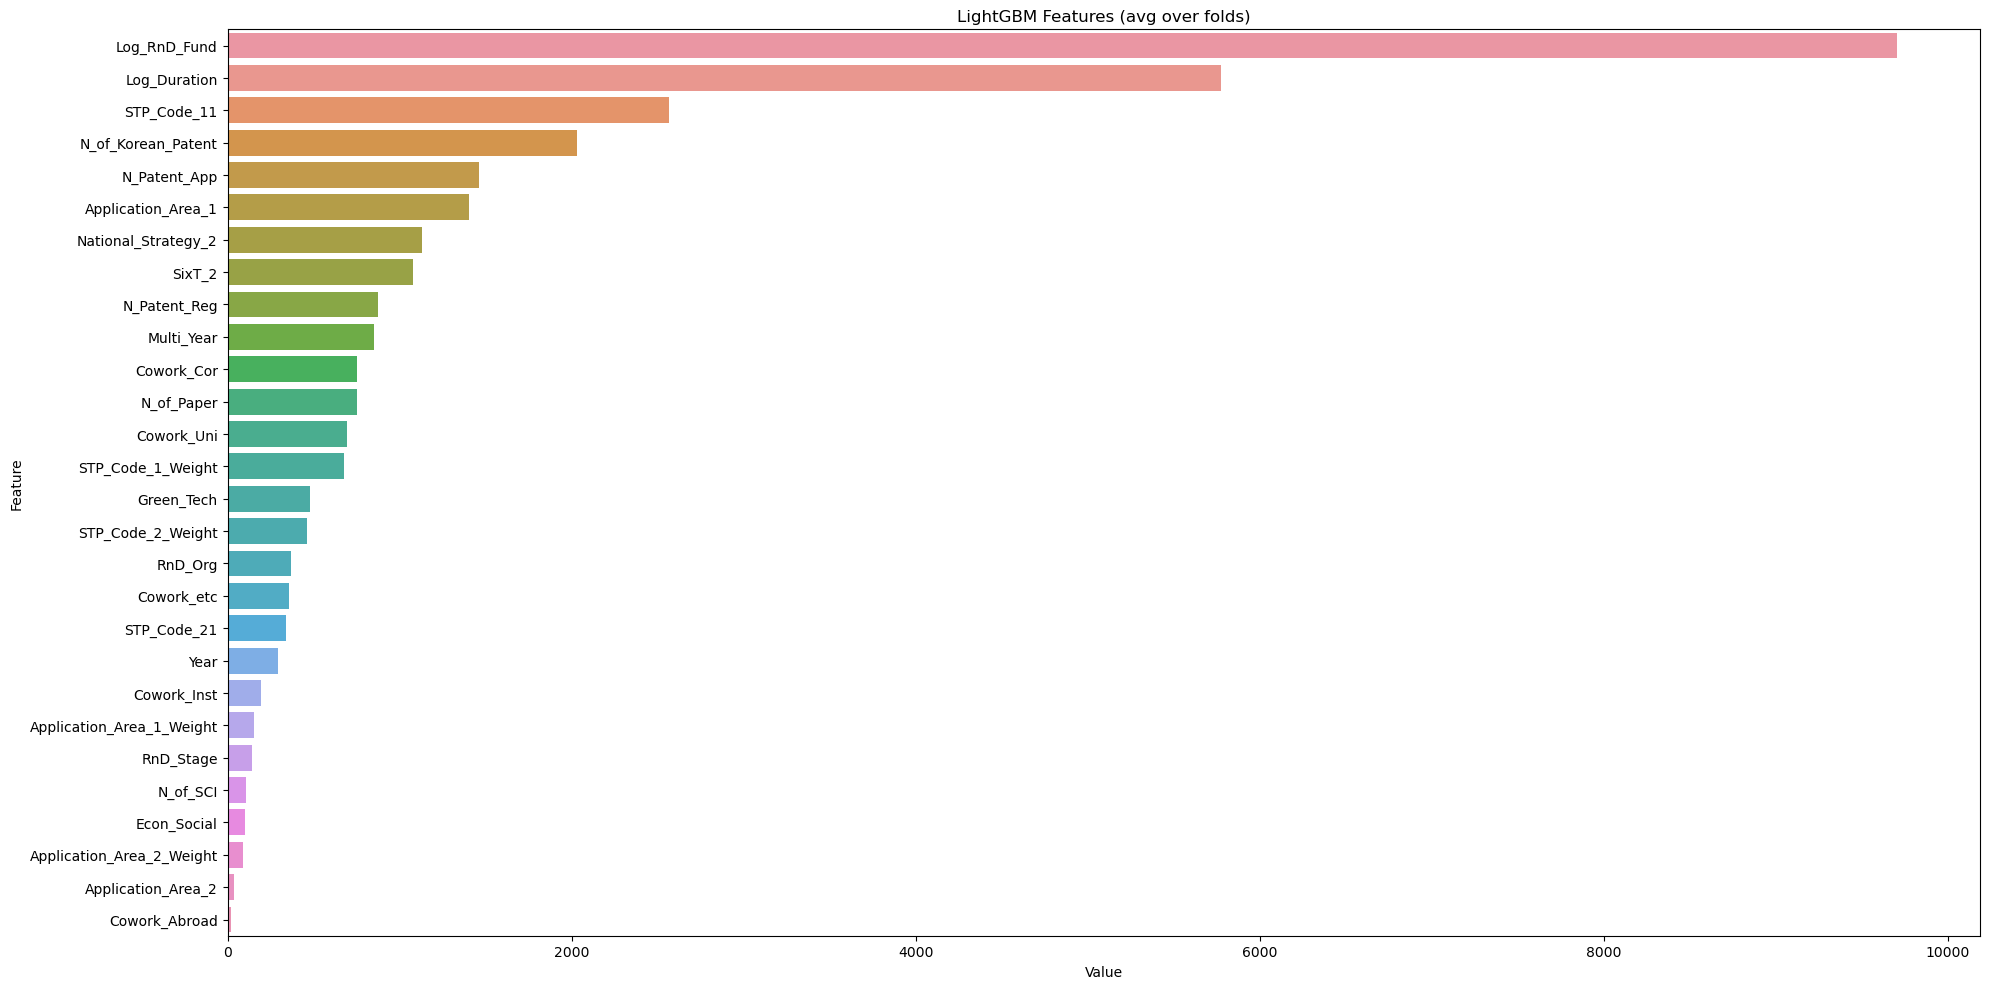

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importances_,data.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()